# WINE_QUALITY_PREDICTION

# SULA WINES DATA


Data import - Varification - Cleaning - Exploration - Standarization - Machine Learning - Prediction - Real Time Prediction

Problem Statement: Predicting wine quality based on various physicochemical properties to assist winemakers and 
                   consumers in making informed decisions about wine selection, production, and quality improvement

Solution: Utilize machine learning algorithms to build a predictive model that can accurately classify or predict wine quality
          based on the provided dataset's physicochemical attributes. This model can then be used to automate wine quality
          assessments, assist in winemaking decisions, and provide recommendations to consumers for better wine selection.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

C:\Users\Sanket\Desktop\New folder\andaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Datasets

In [2]:
wine = pd.read_csv("C:/Users/Sanket/Downloads/winequalityN (1).csv")

# Data Pre-Processing

In [3]:
#show 1st 5 records in dataset
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#show last 5 records in dataset
wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Exploratory Data Analysis (EDA):


In [5]:
#check a shape of dataset
wine.shape

(6497, 13)

In [6]:
#checking the null value in each column
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
#drop null values....
wine.dropna(inplace=True)

In [8]:
wine.shape

(6463, 13)

In [9]:
#after drop chech null values
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#check how many quantity of red &  white wine 
wine['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [11]:
#check how many percentage of red & white wine
wine['type'].value_counts(normalize=True)

white    0.75352
red      0.24648
Name: type, dtype: float64

<AxesSubplot:xlabel='type', ylabel='count'>

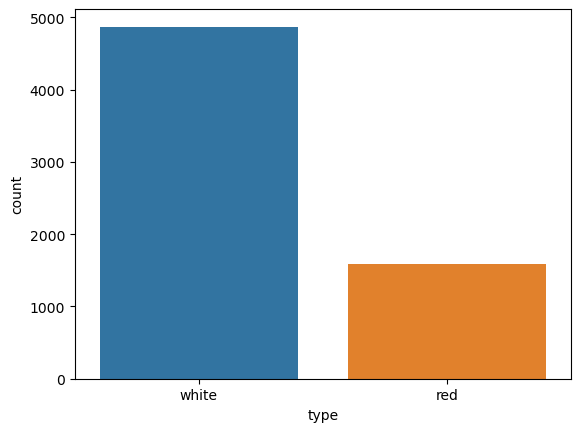

In [12]:
#plot graph red &n white wine
sns.countplot(x='type', data=wine)

<AxesSubplot:>

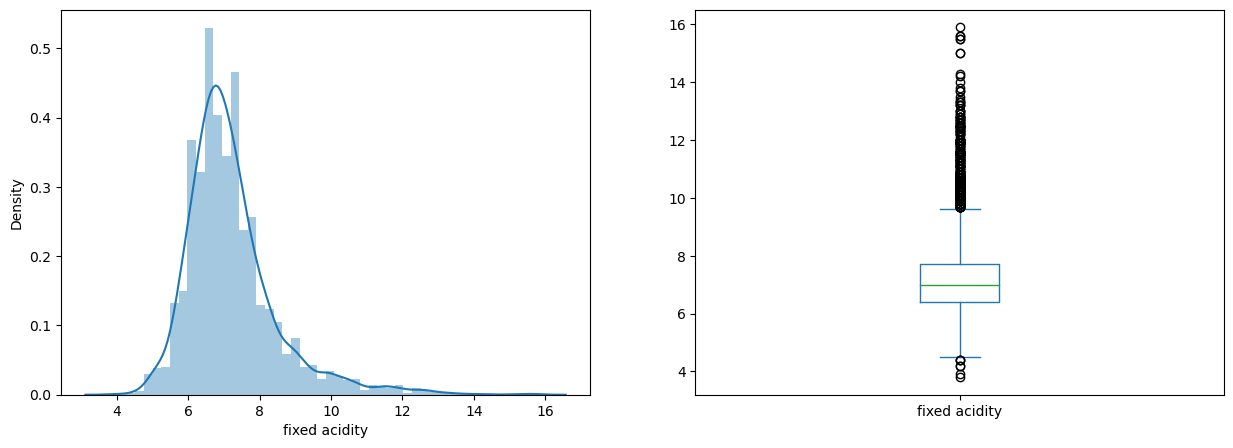

In [13]:
#show distrubution of fix acidity & check outlier is present or not...
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['fixed acidity'])     #singal variabe analysis fixed acidity
plt.subplot(122)
wine['fixed acidity'].plot.box(figsize=(15,5))

1) slitly Right skewed distribution
2) Lot of Outliers in Lower & Upper side average is close to 7.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

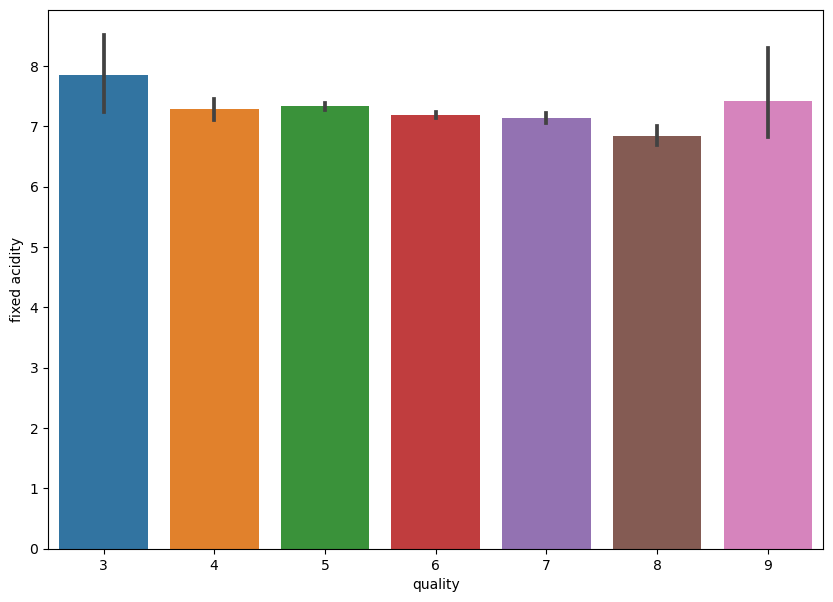

In [14]:
#Bivariate analysis....quality of wine in diff variables.
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='fixed acidity', data=wine)

wine no 7, 8 & 9 has Good Quality

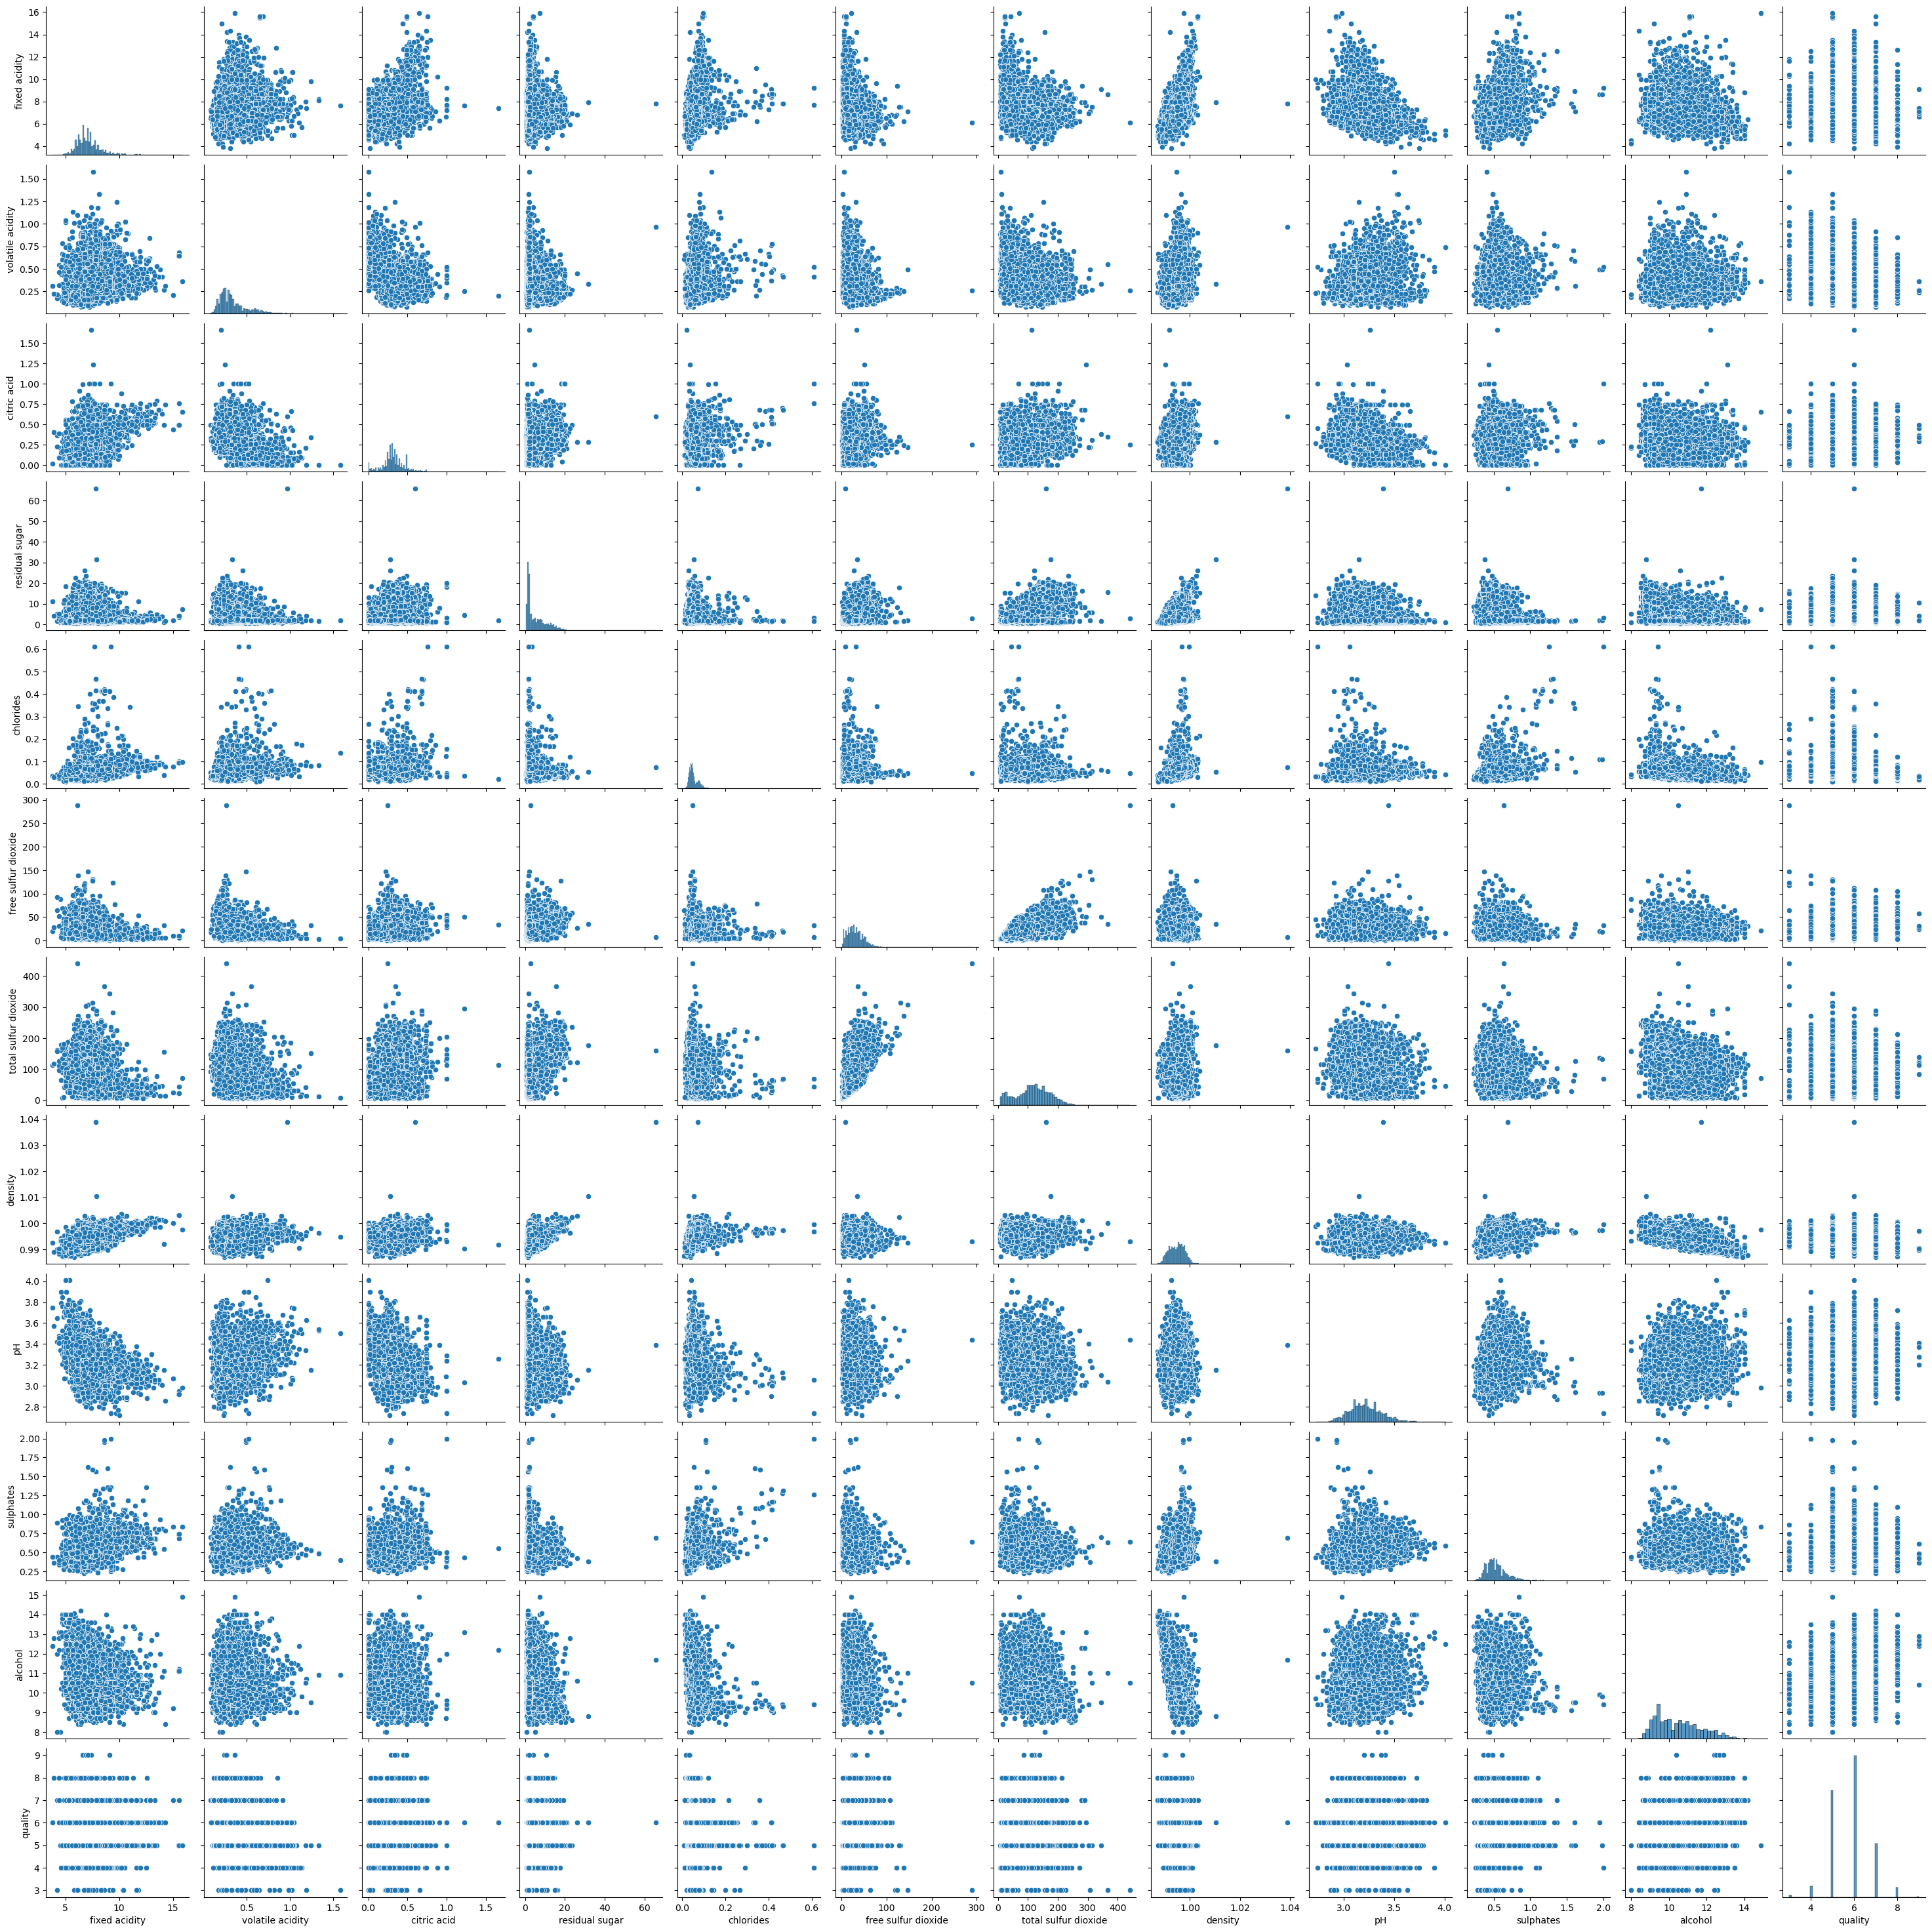

In [15]:
sns.pairplot(wine)

In [16]:
#check correlation each and every variables
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


<AxesSubplot:>

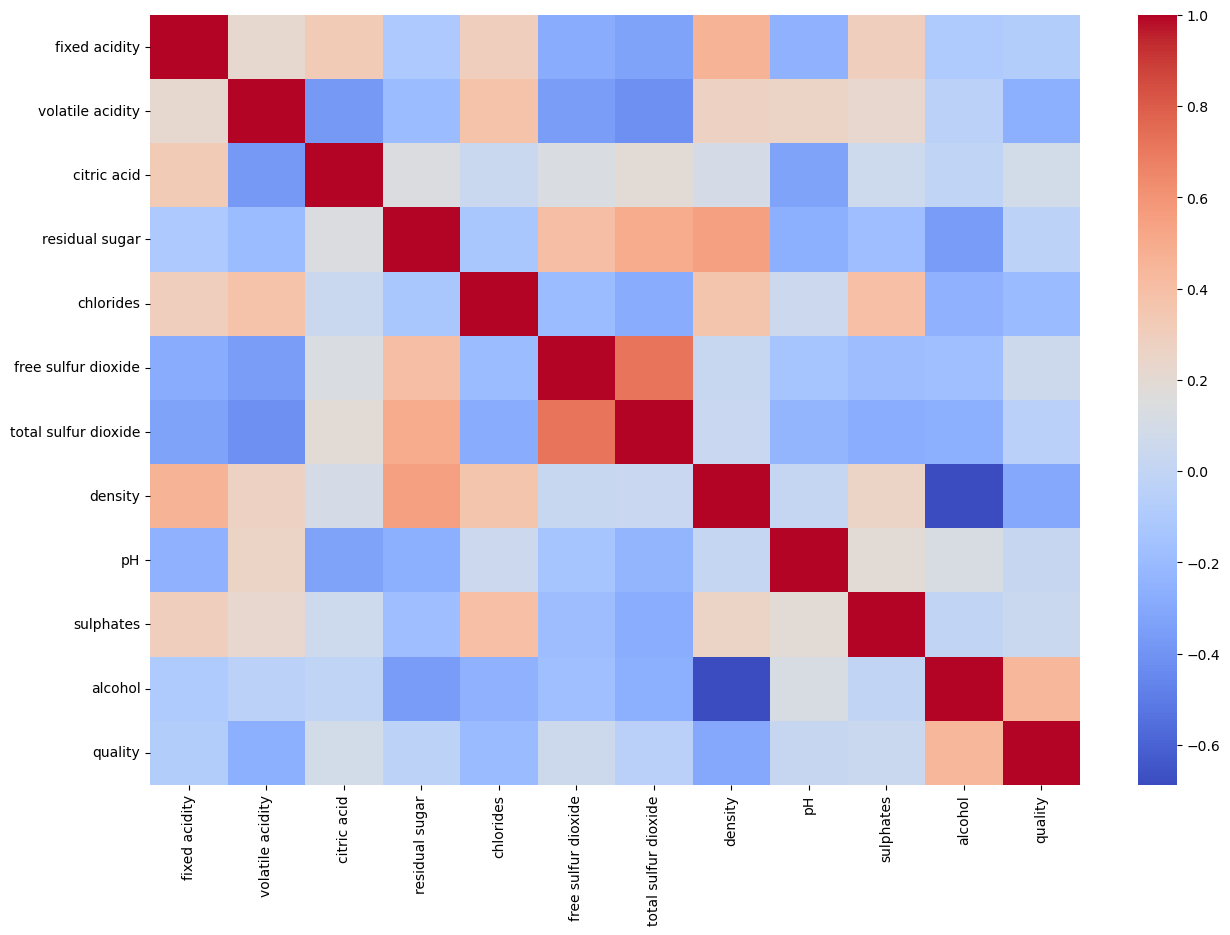

In [17]:
#plot heatmap to check correlation
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(),cmap='coolwarm')

# Feature Engineering (FE):

In [18]:
# Select a test instance and set 'type' to 1
pred_test = wine.iloc[3].copy()
pred_test['type'] = 1
pred_test.drop(['quality', 'total sulfur dioxide'], inplace=True)


In [19]:
#Dropping highly correlated variables - in this case total sulfur dioxide
wine_new = wine.drop('total sulfur dioxide',axis=1)

In [20]:
wine_new.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


In [21]:
#converting the type of wine is numerical to catagorical
wine_ml = pd.get_dummies(wine_new, drop_first=True)

In [22]:
wine_ml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [23]:
wine_ml.dtypes

fixed acidity          float64
volatile acidity       float64
citric acid            float64
residual sugar         float64
chlorides              float64
free sulfur dioxide    float64
density                float64
pH                     float64
sulphates              float64
alcohol                float64
quality                  int64
type_white               uint8
dtype: object

In [24]:
wine_ml.dropna(inplace=True)
X = wine_ml.drop('quality',axis=1)

In [25]:
X.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
type_white             0
dtype: int64

In [26]:
Y = wine_ml['quality'].apply(lambda y: 1 if y > 7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(X)
x_standard = scaler.transform(X)

In [29]:
scaler = StandardScaler()
pred_test = np.asarray(pred_test).reshape(1,-1)
scaler.fit(pred_test)
pred_test_std = scaler.transform(pred_test)

In [30]:
X = x_standard

# Splitting the data into Training data & Test data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=123)

# LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logreg = LogisticRegression()

In [35]:
logreg.fit(X_train, Y_train)

LogisticRegression()

In [36]:
y_pred = logreg.predict(X_test)

In [37]:
pred_test_output = logreg.predict(pred_test_std)
pred_test_output

array([0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test, y_pred)

0.9682907965970611

In [39]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1252
           1       0.00      0.00      0.00        41

    accuracy                           0.97      1293
   macro avg       0.48      0.50      0.49      1293
weighted avg       0.94      0.97      0.95      1293



In [40]:
confusion_matrix(Y_test, y_pred)

array([[1252,    0],
       [  41,    0]], dtype=int64)

# RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=200)

In [43]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [44]:
rfc_pred = rfc.predict(X_test)

In [45]:
accuracy_score(Y_test, rfc_pred)

0.974477958236659

In [46]:
confusion_matrix(Y_test, rfc_pred)

array([[1252,    0],
       [  33,    8]], dtype=int64)

In [47]:
classification_report(Y_test, rfc_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99      1252\n           1       1.00      0.20      0.33        41\n\n    accuracy                           0.97      1293\n   macro avg       0.99      0.60      0.66      1293\nweighted avg       0.98      0.97      0.97      1293\n'

In [48]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1252
           1       1.00      0.20      0.33        41

    accuracy                           0.97      1293
   macro avg       0.99      0.60      0.66      1293
weighted avg       0.98      0.97      0.97      1293



In [49]:
rfc.feature_importances_

array([0.08794648, 0.10562674, 0.07926157, 0.11435106, 0.08904345,
       0.10532381, 0.10947379, 0.09384939, 0.10251619, 0.11049809,
       0.00210944])

# SVM

In [50]:
from sklearn.svm import SVC

In [51]:
# Initialize and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=123)
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=123)

In [52]:
# Make predictions using the SVM classifier
svm_pred = svm_classifier.predict(X_test)

In [53]:
# Calculate accuracy and display classification report and confusion matrix for SVM
svm_accuracy = accuracy_score(Y_test, svm_pred)
print("\nSupport Vector Machine (SVM) Classifier Accuracy:", svm_accuracy)


Support Vector Machine (SVM) Classifier Accuracy: 0.9682907965970611


In [54]:
print(classification_report(Y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1252
           1       0.00      0.00      0.00        41

    accuracy                           0.97      1293
   macro avg       0.48      0.50      0.49      1293
weighted avg       0.94      0.97      0.95      1293



In [55]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, svm_pred))

Confusion Matrix:
[[1252    0]
 [  41    0]]


# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed


In [58]:

# Train the KNN model on the training data
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [59]:
# Predict on the test data
knn_pred = knn.predict(X_test)


In [60]:

# Calculate accuracy and display classification report and confusion matrix for KNN
accuracy_knn = accuracy_score(Y_test, knn_pred)
print("\nK-Nearest Neighbors Classifier Accuracy:", accuracy_knn)



K-Nearest Neighbors Classifier Accuracy: 0.9675174013921114


In [61]:
print(classification_report(Y_test, knn_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1252
           1       0.45      0.12      0.19        41

    accuracy                           0.97      1293
   macro avg       0.71      0.56      0.59      1293
weighted avg       0.96      0.97      0.96      1293



In [62]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, knn_pred))

Confusion Matrix:
[[1246    6]
 [  36    5]]


<AxesSubplot:>

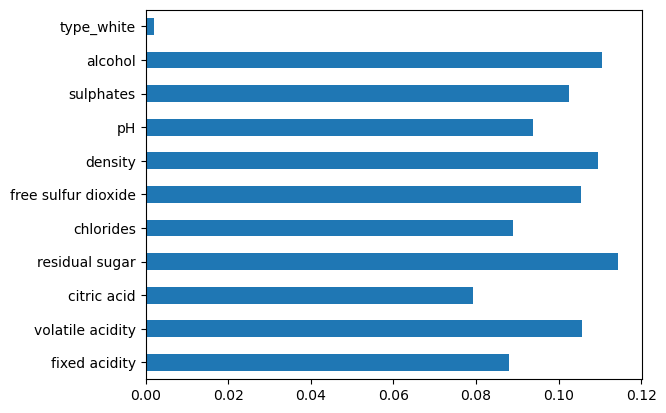

In [63]:
pd.Series(rfc.feature_importances_,index=wine_ml.drop('quality',axis=1).columns).plot(kind='barh')

# Thank You